# LSTM预测股票价格

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 读入股票数据 开盘价在 open 列， 收盘在 close 

In [2]:
print('Load in stockprice data from file...')
dataset_train = pd.read_csv('./data/NSE-TATAGLOBAL.csv')

dataset_train

Load in stockprice data from file...


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


### 摘取 Open 作为训练预测

In [25]:
print('taken the Open data for RNN training...')
training_set = dataset_train.iloc[:,1:2].values

taken the Open data for RNN training...


### 缩放数据到 0-1 范围

Rescale the training data to (0,1) range...


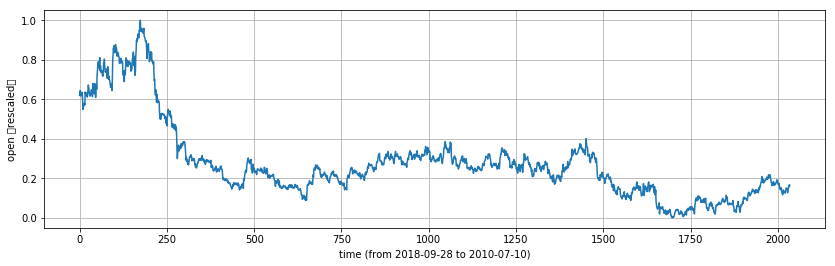

In [24]:
print('Rescale the training data to (0,1) range...')

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(range(len(training_set)), training_set_scaled)
ax.set_xlabel('time (from 2018-09-28 to 2010-07-10)'); ax.set_ylabel('open （rescaled）'); ax.grid()

### 特征与标签，使用60天数据预测一天（一些格式转换）

In [28]:
print('Creating features and targets... (differ by 60 days i.e. predict the price 60 days later)')
ndat = len(training_set_scaled)

X_train = []
y_train = []
for i in range(60, ndat):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print ('Shape of X_train and y_train is ', X_train.shape, y_train.shape)

Creating features and targets... (differ by 60 days i.e. predict the price 60 days later)
Shape of X_train and y_train is  (1975, 60, 1) (1975,)


### 建立 LSTM 模型

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error') 

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_39 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_40 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 50)                20200     
__________

### 用一批新数据测试...

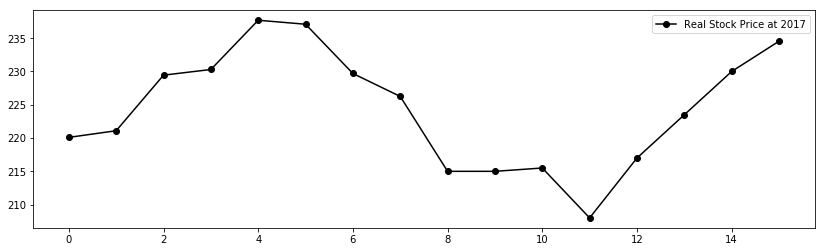

In [60]:
dataset_test = pd.read_csv('./data/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


fig, ax = plt.subplots(figsize=(14,4))
ax.plot(real_stock_price, color = 'black', label = 'Real Stock Price at 2017', marker='o')
ax.legend()



Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0010
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.6388e-04
Epoch 3/10
1975/1975 [==============================] - 9s 5ms/step - loss: 9.9598e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.5347e-04
Epoch 5/10
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0010
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.2002e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.9628e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.1218e-04
Epoch 9/10
1975/1975 [==============================] - 9s 4ms/step - loss: 9.3515e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.8994e-04


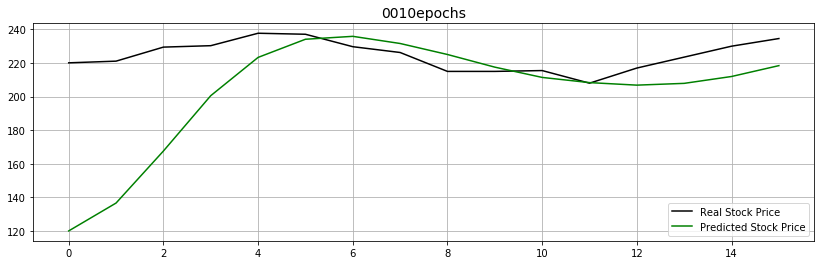

Epoch 1/10
1975/1975 [==============================] - 10s 5ms/step - loss: 9.8831e-04
Epoch 2/10
1975/1975 [==============================] - 9s 4ms/step - loss: 8.5792e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.0590e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.7749e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.2941e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.3203e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.0324e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.3036e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.6327e-04
Epoch 10/10
1975/1975 [==============================] - 9s 5ms/step - loss: 7.5908e-04


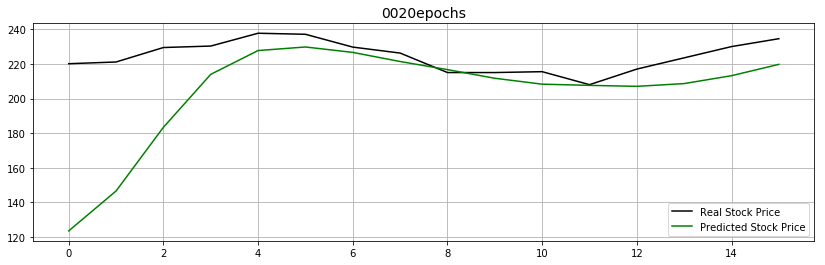

Epoch 1/10
1975/1975 [==============================] - 9s 4ms/step - loss: 7.8260e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.2435e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 9.4017e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.6875e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.4267e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.3817e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.2618e-04
Epoch 8/10
1975/1975 [==============================] - 9s 4ms/step - loss: 8.3115e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.9834e-04
Epoch 10/10
1975/1975 [==============================] - 9s 4ms/step - loss: 7.4100e-04


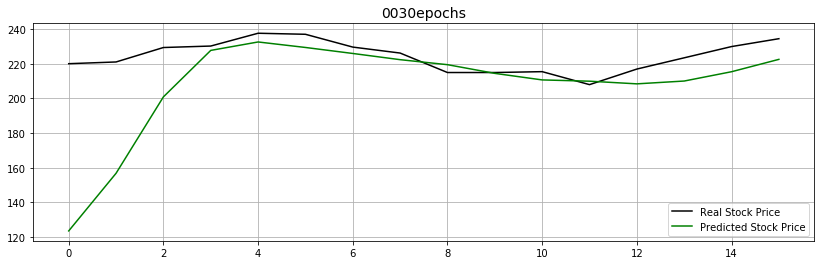

Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.1825e-04
Epoch 2/10
1975/1975 [==============================] - 9s 4ms/step - loss: 7.5771e-04
Epoch 3/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.6925e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.3163e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.7818e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.8357e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4693e-04
Epoch 8/10
1975/1975 [==============================] - 9s 4ms/step - loss: 7.4791e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.3711e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.2628e-04


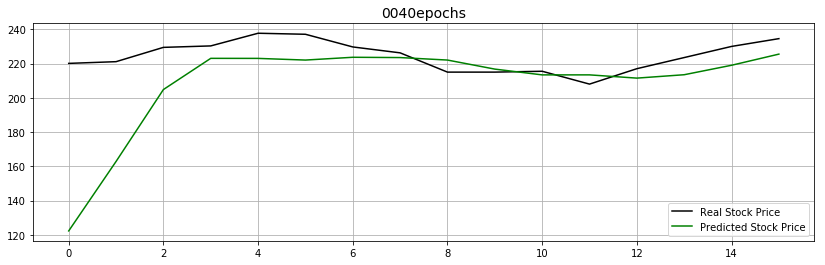

Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.3827e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.7671e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.0735e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.0496e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.7643e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1349e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.2250e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.4937e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.8329e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.6470e-04


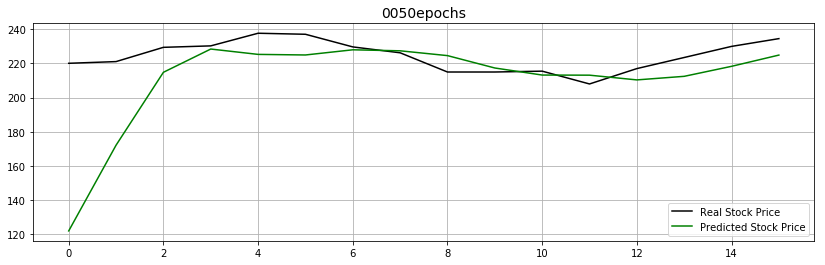

Epoch 1/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.7506e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.0735e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5127e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.9235e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.1908e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4352e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.7711e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1373e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5255e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.2744e-04


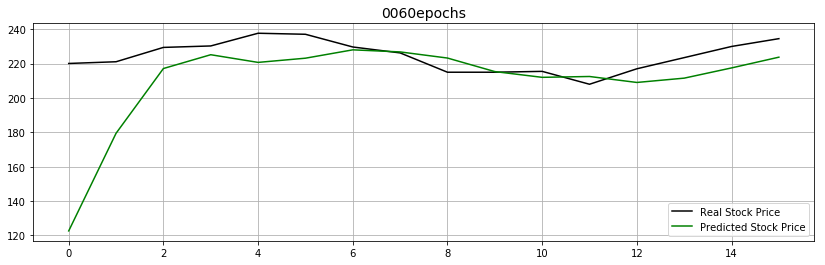

Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5333e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.7464e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1323e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4549e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.5227e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5305e-04
Epoch 7/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.1764e-04
Epoch 8/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.3736e-04
Epoch 9/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.1903e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.8713e-04


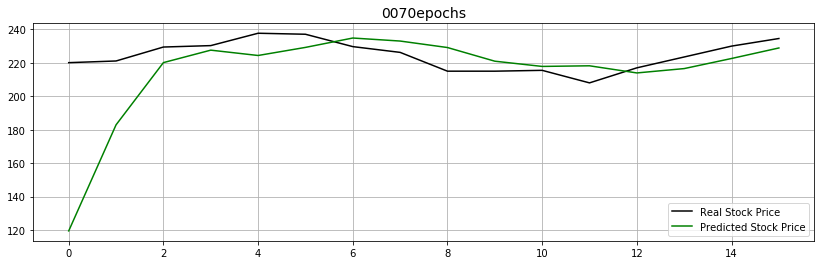

Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.2719e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.1111e-04
Epoch 3/10
1975/1975 [==============================] - 9s 4ms/step - loss: 6.5655e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.7798e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.8840e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5252e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4494e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.5287e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.0558e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.9460e-04


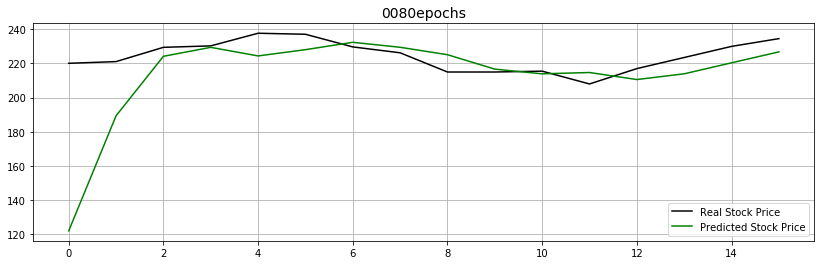

Epoch 1/10
1975/1975 [==============================] - 7s 4ms/step - loss: 6.9891e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 8.1647e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.6609e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.8341e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.1961e-04
Epoch 6/10
1975/1975 [==============================] - 9s 5ms/step - loss: 5.8060e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.6338e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.6093e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1092e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4440e-04


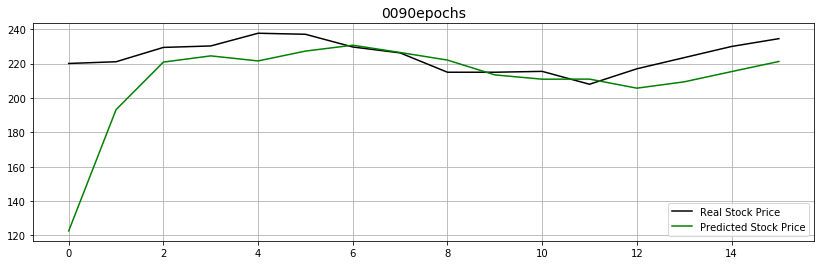

Epoch 1/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.4648e-04
Epoch 2/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.4661e-04
Epoch 3/10
1975/1975 [==============================] - 8s 4ms/step - loss: 7.4867e-04
Epoch 4/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4064e-04
Epoch 5/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.3335e-04
Epoch 6/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.9812e-04
Epoch 7/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1374e-04
Epoch 8/10
1975/1975 [==============================] - 8s 4ms/step - loss: 6.4405e-04
Epoch 9/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.2096e-04
Epoch 10/10
1975/1975 [==============================] - 8s 4ms/step - loss: 5.4781e-04


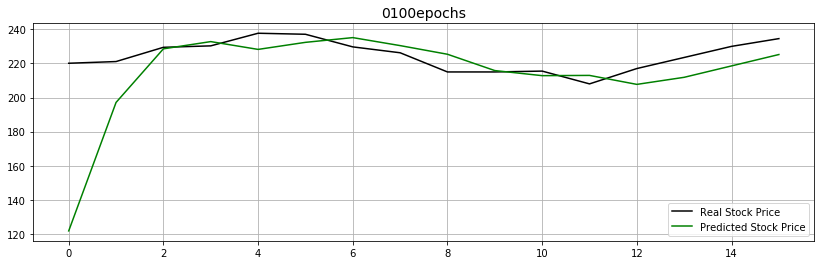

In [65]:
base = 0

epochs = 0
for iepoch in range(10):

    regressor.fit(X_train, y_train, epochs = 10, batch_size=32)

    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    fig, ax = plt.subplots(figsize=(14,4))
    ax.plot(real_stock_price, color = 'black', label = 'Real Stock Price')
    ax.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
    ax.legend(); ax.grid()
    modelname = '%04i'%(iepoch*10+base+10)+'epochs'
    ax.set_title(modelname, fontsize=14)
    fig.savefig(modelname+'.png', format='png')
    plt.show()
    regressor.save(modelname+'.h5')